In [8]:
import sys
print(sys.version,'\n',
     sys.version_info,'\n',
     sys.hexversion)

3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)] 
 sys.version_info(major=3, minor=7, micro=6, releaselevel='final', serial=0) 
 50792176


In [1]:
total=0
i=1
while i <= 100:
    total += i
    i += 1
print("The sum of the first 100 integers is",total)

The sum of the first 100 integers is 5050


In [4]:
ida=None
print(ida)
a=ida
print(a is None)

None
True


In [6]:
print("this is how i get rid of the line feed",end=' ')
print("this")

this is how i get rid of the line feed this


In [11]:
print('A'<'B','A'>'B',"ZRA">"ZR")

True False True


In [16]:
listA=[0,1,2,3] 
listB=listA.extend([4,5,6]) 
print(listA,listB)

[0, 1, 2, 3, 4, 5, 6] None


In [17]:
theList = [ 10, 11, 12, 13 ] 
theList.remove( 11 ) 
print( theList )
x = theList.pop( 1 ) 
print( "list =", theList )
print( "x =", x ) 

[10, 12, 13]
list = [10, 13]
x = 12


In [1]:
states = { 'MS' : 'Mississippi', 'VA' : 'Virginia', 'AL' : 'Alabama', 'DC' : 'Washington' } 
classLevel = { 0 : 'Freshman', 1 : 'Sophomore', 2 : 'Junior', 3: 'Senior' } 
print(states.get('MS'))
for i in classLevel:
    print(i,'=',classLevel[i])

Mississippi
0 = Freshman
1 = Sophomore
2 = Junior
3 = Senior


Function 에 대하여
------------

함수 정의의 순서는 중요치 않다. main 이 먼저 정의되었지만 거기에서 rollDice 를 사용하고 있다.

In [3]:
from random import randint
minsides=4
def main():
    print("2 Dice roll simulation")
    num=int(input("Ho many sides should the die have? (more than 4) "))
    if num<minsides:
        num=minsides
    print("You rolled a",rollDice(num))

def rollDice(n):
    die1=randint(1,n+1)
    die2=randint(1,n+1)
    return die1+die2
main()

2 Dice roll simulation
Ho many sides should the die have? (more than 4) 5
You rolled a 5


다른 class 에서 이름 겹치게 따로 쓸 수 있다.

In [7]:
from math import sqrt
class modA():
    def userFnct(x,y):
        d=sqrt(x*x+y*y)
        return d
class modB():
    def userFnct(x,y):
        return x+y
x=int(input("Enter value one: "))
y=int(input("Enter value two: "))
print(modA.userFnct(x,y))
print(modB.userFnct(x,y))

Enter value one: 1
Enter value two: 2
2.23606797749979
3


문제가 일어났을 때 그냥 멈춰버리지 않고 exception 에 해당하는 블록을 실행한다: try - except

=> 이렇게 하면 코드가 작동중지하는 일을 막을 수 있다.

The try block ﬂags the code in which we want to catch any exceptions that may be raised during execution. The except block indicates the action to take when the given type of exception is raised within the corresponding try block. If no exception is raised, execution ﬂows normally and the except block is skipped. When an exception is raised, the normal ﬂow of execution is interrupted. If an except block is provided for the type of exception raised, execution jumps to the ﬁrst statement within that except block. On the other hand, if there is no corresponding except block, the program terminates.


In [13]:
while True:
    try:
        value=int(input("Enter an integer value: "))
        break
    except TypeError:
        print("You must enter an integer value. Try again.")

Enter an integer value: aaa


ValueError: invalid literal for int() with base 10: 'aaa'

In [9]:
while True:
    try:
        value=int(input("Enter an integer value: "))
        break
    except ValueError:
        print("You must enter an integer value. Try again.")

Enter an integer value: 1d
You must enter an integer value. Try again.
Enter an integer value: 2d
You must enter an integer value. Try again.
Enter an integer value: 1


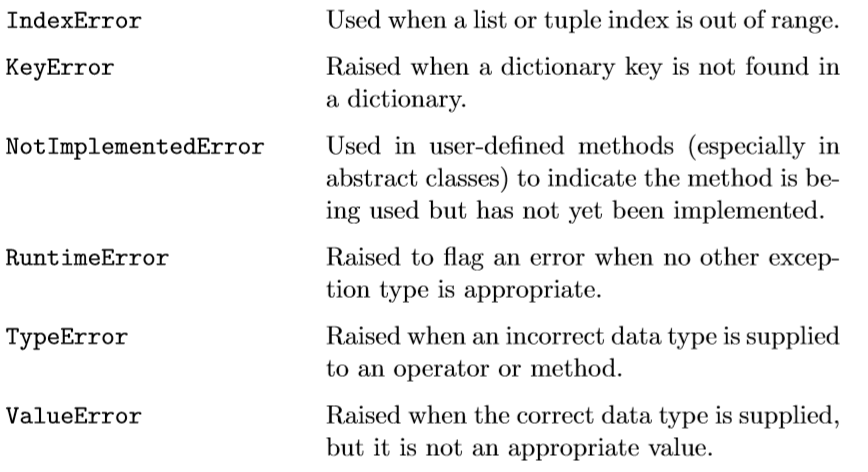

혹은, 사용자가 직접 에러를 지정할 수 있다.

In [22]:
def min2(arg1,arg2):
    if arg1 is None or arg2 is None:
        raise TypeError("argument to min2() cannot be None")  #TypeError, ValueError, IndexError ...
    if arg1 < arg2:
        return arg1
    else:
        return arg2
y=min2(x,None)
print(y)

TypeError: argument to min2() cannot be None

이와 유사한 방법으로 assert 가 있다. 사실 무슨 차이가 있는지 모르겠다.

In [23]:
def min2(arg1,arg2):
    assert arg1 is not None and arg2 is not None, "argument to min2() cannot be None"
    if arg1 < arg2:
        return arg1
    else:
        return arg2
y=min2(x,None)
print(y)

AssertionError: argument to min2() cannot be None

Class 에 대하여
-------------

underbar _ 의 의미

In [23]:
from math import sqrt
class Point:
    def __init__(self,x,y):
        self.xCoord=x
        self.yCoord=y
    def getX(self):
        return self.xCoord
    def getY(self):
        return self.yCoord
    def shift(self,xInc,yInc):
        self.xCoord += xInc
        self.yCoord += yInc
    def distance(self,otherpoint):
        xDiff=self.xCoord-otherpoint.xCoord
        yDiff=self.yCoord-otherpoint.yCoord
        return sqrt(xDiff**2+yDiff**2)
pointA=Point(3,5)
pointB=Point(7,10)
pointB.shift(0,-2) #(7,8)
print(pointA.distance(pointB)) #1

class LineSegment:
    def __init__(self,fromPoint,toPoint):
        self._pointA=fromPoint
        self._pointB=toPoint
    def endPointA(self):
        return self._pointA #'_' 는 보호를 위한거랍니다. 아래 markdown 참조.
    def endPointB(self):
        return self._pointB
    def length(self):
        return self._pointA.distance(self._pointB)
    def isVertical(self):
        return self._pointA.getX() == self._pointB.getX()
    def slope(self):
        if self.isVertical():
            return None
        else:
            run=self._pointA.getX()-self._pointB.getX()
            rise=self._pointA.getY()-self._pointB.getY()
            return rise/run
K=LineSegment(pointA,pointB)
print(K.slope()) #2
print(K.endPointA().getX()) #3

5.0
0.75
3


_single_leading_underscore: 주로 한 모듈 내부에서만 사용하는 private 클래스/함수/변수/메서드를 선언할 때 사용하는 컨벤션이다. 이 컨벤션으로 선언하게 되면 from module import *시 _로 시작하는 것들은 모두 임포트에서 무시된다. 그러나, 파이썬은 진정한 의미의 private을 지원하고 있지는 않기 때문에 private을 완전히 강제할 수는 없다. 즉, 위와 같은 임포트문에서는 무시되지만 직접 가져다 쓰거나 호출을 할 경우엔 사용이 가능하다. 그래서 “weak internal use indicator"라고 부르기도 한다. 출처 : https://mingrammer.com/underscore-in-python/

class object 에 대해 좀더 자연스러운 코딩을 위해 Overloading Operators 방식을 사용한다. (pdf 521p/ 교재 501p)

In [7]:
# 새로 정의한 object 에 대해 우리가 이미 아는 operation 을 적용시킬 때 에는 그것을 class method 로 정의해줘야 한다.

class Point:
    def __init__(self,x,y):
        self.xCoord=x
        self.yCoord=y
    
p1=Point(1,2)
p2=Point(1,2)

if p1==p2:
    print("The points are equal.")
else:
    print("The points are different")


class Point:
    def __init__(self,x,y):
        self.xCoord=x
        self.yCoord=y
    def __eq__(self,rhsPoint):  # object 는 call 되면서 다른 위치에 저장되어 다르다고 뜬다. 값을 비교하려면 이렇게 정의해야 한다.
        return self.xCoord==rhsPoint.xCoord and self.yCoord==rhsPoint.yCoord
    
p1=Point(1,2)
p2=Point(1,2)

if p1==p2:
    print("The points are equal.")
else:
    print("The points are different")

The points are different
The points are equal.


In [10]:
class Point:
    def __init__(self,x,y):
        self.xCoord=x
        self.yCoord=y
    def __str__(self):
        return "("+str(self.xCoord)+", "+str(self.yCoord)+")"
p=Point(3,5)
print(str(p))

(3, 5)


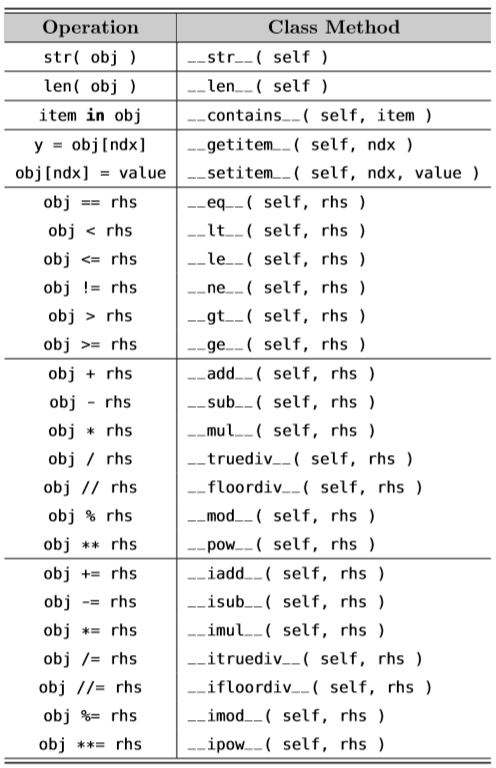

Inheritance

아래 코드에 대한 설명이다.

 In addition, the book object also inherits all of the parent’s methods. But since we have provided new deﬁnitions for the constructor and the getBibEntry() method, the only method actually inherited from the parent is the getCode() method. (교재 505p, pdf 기준 525p)


In [10]:
class Publication:
    def __init__(self,code,title,author):
        self._code=code
        self._title=title
        self._author=author
    
    def getCode(self):
        return self._code
    
    def getBibEntry(self):
        return '['+self.getCode()+'] "'+self._title+'" by '+self._author

A=Publication('1241asd3','WWW','John Kendrick')
print(A.getBibEntry())

class Book(Publication):                                               #괄호에 들어온 놈이 super() 가 된다.
    def __init__(self,code,title,author,publisher,year):
        super().__init__(code,title,author)
        self._publisher=publisher
        self._year=year
    def getBibEntry(self):
        print(super())
        return super().getBibEntry() + ', '+self._publisher+', '+self._year

B=Book('1241asd3','WWW','John Kendrick','Wilson','2002')
print(B.getBibEntry())

[1241asd3] "WWW" by John Kendrick
<super: <class 'Book'>, <Book object>>
[1241asd3] "WWW" by John Kendrick, Wilson, 2002


In [16]:
class Publication:
    def __init__(self,code,title,author):
        self._code=code
        self._title=title
        self._author=author
    
    def getCode(self):
        return self._code
    
    def getBibEntry(self):
        return '['+self.getCode()+'] "'+self._title+'" by '+self._author
    
class Book(Publication):                                               #괄호에 들어온 놈이 super() 가 된다.
    def __init__(self,code,title,author,publisher,year):
        super().__init__(code,title,author)
        self._publisher=publisher
        self._year=year
    def getBibEntry(self):
        return super().getBibEntry() + ', '+self._publisher+', '+self._year
    
class Chapter(Book):
    def __init__(self,code,title,author,publisher,year,chapter,pages):
        super().__init__(code,title,author,publisher,year)
        self._chapter=chapter
        self._pages=pages
    def getBibEntry(self):
        return super().getBibEntry()+', Chapter '+str(self._chapter)+' page.'+str(self._pages)+'.'    #여기서 super는 book꺼.

C=Chapter('1241asd3','WWW','John Kendrick','Wilson','2002',3,124)
print(C.getBibEntry())


[1241asd3] "WWW" by John Kendrick, Wilson, 2002, Chapter 3 page.124.


Remember, when an object is used within the print() function, the str operator method is automatically called for that object.

In [17]:
class Publication:
    def __init__(self,code,title,author):
        self._code=code
        self._title=title
        self._author=author
    
    def getCode(self):
        return self._code
    
    def getBibEntry(self):
        return '['+self.getCode()+'] "'+self._title+'" by '+self._author
    
    def __str__(self):
        return self.getBibEntry()
    
A=Publication('1241asd3','WWW','John Kendrick')
print(A)

[1241asd3] "WWW" by John Kendrick
